In [2]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test = cv2.imread('./imgs_E/E10_G0.png')
test.shape

(1944, 2592, 3)

In [4]:
path = './imgs_E'
x, y = [], []

for filename in os.listdir(path):
    file = os.path.join(path, filename)
    x.append(int(filename.split('_')[0][1:]))               # exposure parameter exploration
    img = cv2.imread(file)
    y.append(np.mean(img[483-5:483+5, 1777-5:1777+5, 2]))   # mean pixel value
    # print(img[0:10, 0:10, 0:10])
    # cv2.imshow(filename, img)
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    # print(filename, img[483, 1777, 2])
    # print(np.unravel_index(np.argmax(img[:, :, 2]), img[:, :, 2].shape))

In [4]:
len(x), len(y)

(31, 31)

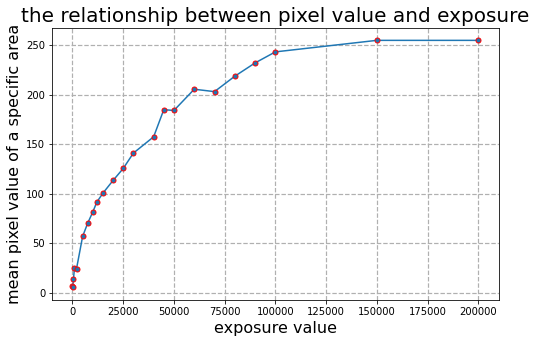

In [5]:
x, y = zip(*sorted(zip(x, y)))
plt.figure(figsize=(8, 5))
plt.plot(x[:23], y[:23], marker='o', markersize='5', markeredgecolor='red')
plt.title('the relationship between pixel value and exposure', fontsize=20)
plt.ylabel('mean pixel value of a specific area', fontsize=16)
plt.xlabel('exposure value', fontsize=16)
plt.grid(ls='--', linewidth=1.2)
plt.show()

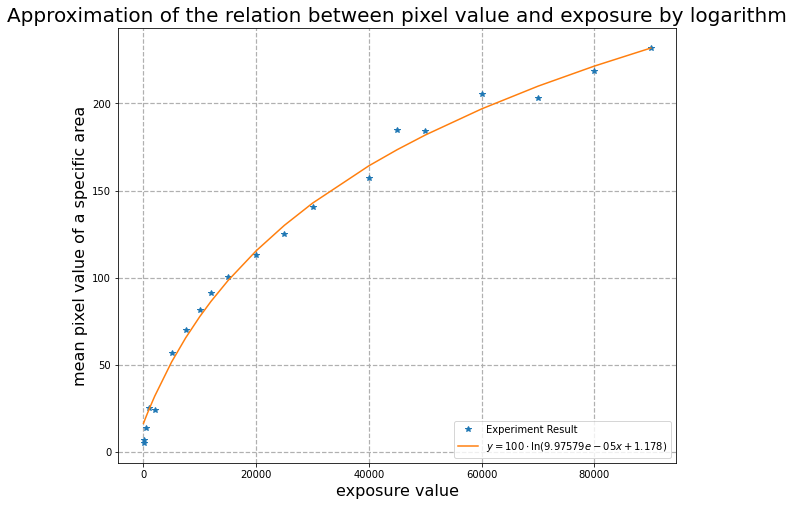

In [17]:
E = x[:20]
P = y[:20]

# Hyperparameters
shift_P = 0
shrink_P = 100

coeff = np.polyfit(E, np.exp(np.divide(np.add(P, shift_P), shrink_P)), 1)
def approx_log(x, coeff):
    return shrink_P * np.log(coeff[0] * x + coeff[1]) + shift_P

lnval = list( approx_log(e, coeff) for e in E )

plt.figure(figsize=(10, 8))
plt.plot(E, P, '*')
plt.plot(E, lnval)
plt.title('Approximation of the relation between pixel value and exposure by logarithm', fontsize=20)
plt.ylabel('mean pixel value of a specific area', fontsize=16)
plt.xlabel('exposure value', fontsize=16)
plt.grid(ls='--', linewidth=1.2)
plt.legend(['Experiment Result', '$y = ' + str(shrink_P) + '\cdot \ln(' + str(round(coeff[0], 10)) + 'x + '+ str(round(coeff[1], 3)) + ')' + (str(shift_P) if shift_P != 0 else '') + '$'], loc = 'lower right')
plt.show()

In [5]:
path = 'imgs_G'
x = []
y = []

for filename in os.listdir(path):
    file = os.path.join(path, filename)
    lst = re.split(r'[G|_|.]', filename)
    # print(lst)
    x.append(float(lst[2] + '.' + lst[3]))
    # x.append(float(filename.split('_')[1][1:]))
    img = cv2.imread(file)
    # print(img[0:10, 0:10, 0:10])
    # cv2.imshow(filename, img)
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    # print(filename, img[483, 1777, 2])
    # print(np.unravel_index(np.argmax(img[:, :, 2]), img[:, :, 2].shape))
    y.append(np.mean(img[483-5:483+5, 1777-5:1777+5, 1]))

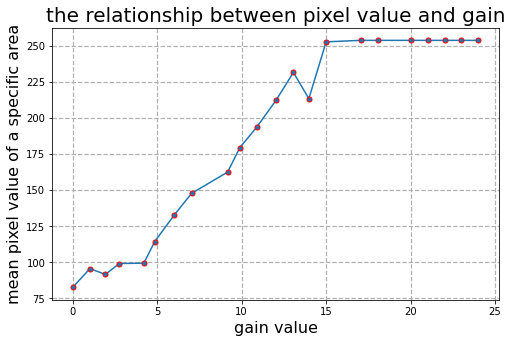

In [6]:
# print(x)
# print(y)
x, y = zip(*sorted(zip(x, y)))
plt.figure(figsize=(8, 5))
plt.plot(x[:23], y[:23], marker='o', markersize='5', markeredgecolor='red')
plt.title('the relationship between pixel value and gain', fontsize=20)
plt.ylabel('mean pixel value of a specific area', fontsize=16)
plt.xlabel('gain value', fontsize=16)
plt.grid(ls='--', linewidth=1.2)
plt.show()

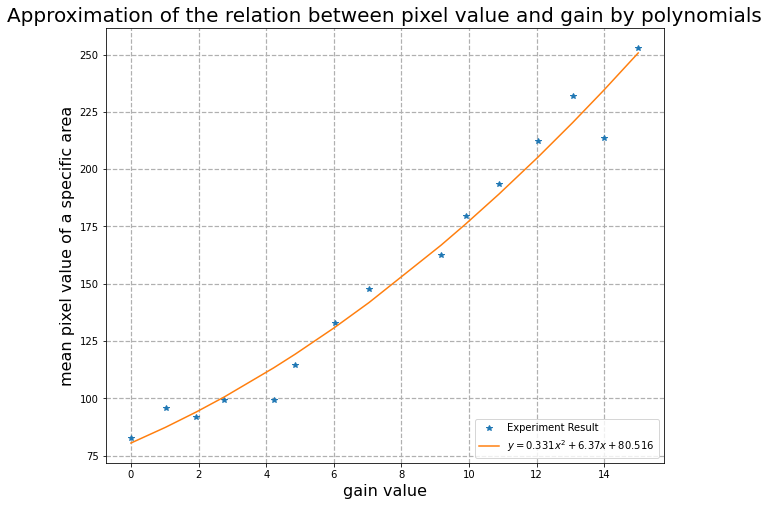

In [8]:
G = x[:15]
P = y[:15]
coeff = np.polyfit(G, P, 2)
poly = np.poly1d(coeff)
pval = poly(G)

plt.figure(figsize=(10, 8))
plt.plot(G, P, '*')
plt.plot(G, pval)
plt.title('Approximation of the relation between pixel value and gain by polynomials', fontsize=20)
plt.ylabel('mean pixel value of a specific area', fontsize=16)
plt.xlabel('gain value', fontsize=16)
plt.grid(ls='--', linewidth=1.2)
plt.legend(['Experiment Result', '$y = ' + str(round(coeff[0], 3)) + 'x^2 + '+ str(round(coeff[1], 3)) + 'x + ' + str(round(coeff[2], 3)) + '$'], loc = 'lower right')
plt.show()